<a href="https://colab.research.google.com/github/Who0am0I/Customer-Sales-Insights-Analysis/blob/main/Customer_Sales_Insights_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python Project
---

In [ ]:
import pandas as pd

# Customers
---

In [ ]:
# Import libraries
import pandas as pd

# Assign Column Types
col_types = {
    'Customer ID' : str,
    'Postal Code' : str
}

# Reading File
customers = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Python Project/Customer Data.xlsx', dtype = col_types)

# Removing null values
customers = customers.dropna(how = 'all')

# Reset Index
customers = customers.reset_index(drop = True)

# Create State DataFrame for Country and State Column
states = customers[['Country','State']]
states = states.dropna()
states['Country'] = states['Country'].replace('United States','USA')
states = states.drop_duplicates()
states = states.reset_index(drop = True)

# Join Customer DataFrame with State
# customers = pd.merge(customers, states, how = 'left', on = 'State')
customers = customers.merge(states, how = 'left', on = 'State')

# Drop Original Column
customers = customers.drop('Country_x', axis = 1)

# Rename the New Country Column
customers = customers.rename({'Country_y' : 'Country'}, axis = 1)

# Explore DataFrame
customers.head(20)

,Customer ID,Customer Name,Client Segment,State,Postal Code,Region,Country
0,12520,Claire Gute,Consumer,Kentucky,42420,South,USA
1,13045,Darrin Van Huff,Corporate,Kentucky,90036,West,USA
2,20335,Sean O'Donnell,Consumer,Cairo,33311,South,Egypt
3,20065,Sandra Flanagan,Consumer,Pennsylvania,19140,East,USA
4,13870,Emily Burns,Consumer,Utah,84057,West,USA
5,13945,Eric Hoffmann,Consumer,California,90049,West,USA
6,21520,NaN,NaN,Cairo,19140,East,Egypt
7,17560,NaN,NaN,Texas,77095,Central,USA
8,14485,Gene Hale,Corporate,Texas,75080,Central,USA
9,20710,Steve Nguyen,Home Office,Texas,77041,Central,USA


# Sales
---

In [ ]:
import os
# Actual Data
folder_path = '/content/drive/MyDrive/Colab Notebooks/Data/Python Project/Sales'
# Empty List
tables = []

for filename in os.listdir(folder_path):
  # Create file path
  file_path = folder_path + '/' + filename
  # Read file
  sales = pd.read_csv(file_path)
  # Split
  sales = sales[sales.columns[0]].str.split(';', expand = True)
  # Use First Row as header
  sales.columns = sales.loc[0]
  # Remove First Row
  sales = sales.drop(0)
  # Append to the empty list
  tables.append(sales)

# Explore DataFrame
sales_full = pd.concat(tables)
sales_full = sales_full.reset_index(drop = True)


def split_cols(df, cols, delimeter):
  # Apply for multiple cols
  for col in cols:
    # Splitted the columns
    splitted_df = df[col].str.split(delimeter, expand = True)
    # Rename the needed columns
    for i in range(splitted_df.shape[1]):
      df[col + '_' + str(i)] = splitted_df[i]
    # Remove the original column
    df = df.drop(col, axis = 1)

  return df

# Change Col Types
sales_full['Quantity'] = sales_full['Quantity'].astype(int)
sales_full['Purchasing Price'] = sales_full['Purchasing Price'].astype(float)
sales_full['Planned Sales Price'] = sales_full['Planned Sales Price'].astype(float)
sales_full['Discount'] = sales_full['Discount'].astype(float)
sales_full['Order Date'] = pd.to_datetime(sales_full['Order Date'], format = "%d/%m/%Y")
sales_full['Shipping Date'] = pd.to_datetime(sales_full['Shipping Date'], format = "%d/%m/%Y")

# Split Needed Cols
sales_full = split_cols(sales_full, ['Customer ID','Product ID'], '-')
sales_full = sales_full.drop(['Customer ID_0','Product ID_0','Product ID_1'], axis = 1)
sales_full = sales_full.rename({'Customer ID_1' : 'Customer ID', 'Product ID_2': 'Product ID'}, axis = 1)

# Explore DataFrame
sales_full.head()

,Order ID,Order Date,Shipping Date,Ship Mode,Quantity,Purchasing Price,Planned Sales Price,Discount,Customer ID,Product ID
0,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,3,9.3312,15.552,0.04,10480,10002365
1,US-2017-156909,2017-07-16,2017-07-18,Second Class,2,35.6860,71.372,0.05,20065,10002774
2,CA-2017-107727,2017-10-19,2017-10-23,Second Class,3,14.7360,29.472,0.00,17560,10000249
3,CA-2017-120999,2017-09-10,2017-09-15,Standard Class,4,80.9424,147.168,0.00,16930,10004093
4,CA-2017-139619,2017-09-19,2017-09-23,Standard Class,2,47.8080,95.616,0.00,14080,10003282


# Products
---

In [ ]:
# Reading DataFrame
products = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Data/Python Project/Products.xlsx')

# Change Col Type
products['Product ID'] = products['Product ID'].astype(str)

# Check
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710 entries, 0 to 709
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Product ID        710 non-null    object
 1   Product Category  710 non-null    object
 2   Sub-Category      710 non-null    object
 3   Product Name      710 non-null    object
dtypes: object(4)
memory usage: 22.3+ KB


# Merge all DataFrames into One DataFrame
---

In [ ]:
final_df = pd.merge(sales_full, customers, how = 'left', on = 'Customer ID')
final_df = pd.merge(final_df, products, how = 'left', on = 'Product ID')

final_df.head(2)

,Order ID,Order Date,Shipping Date,Ship Mode,Quantity,Purchasing Price,Planned Sales Price,Discount,Customer ID,Product ID,Customer Name,Client Segment,State,Postal Code,Region,Country,Product Category,Sub-Category,Product Name
0,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,3,9.3312,15.552,0.04,10480,10002365,NaN,NaN,NaN,NaN,NaN,NaN,Office Supplies,Paper,Xerox 1967
1,US-2017-156909,2017-07-16,2017-07-18,Second Class,2,35.6860,71.372,0.05,20065,10002774,Sandra Flanagan,Consumer,Pennsylvania,19140,East,USA,Furniture,Chairs,"Global Deluxe Stacking Chair, Gray"


In [ ]:
final_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Data/Python Project/FinalData.csv')

# Analysis
---

In [ ]:
# Business Questions
pd.pivot_table(
    final_df,
    index = ['Product Category', 'Sub-Category'],
    columns = ['Client Segment'],
    values = ['Quantity'],
    aggfunc = ['sum']
)

# Validation
final_df['Product Category'].value_counts()

# check values from statistical point of view
final_df.describe()

,Order Date,Shipping Date,Quantity,Purchasing Price,Planned Sales Price,Discount
count,1007,1007,1007.000000,1007.000000,1007.000000,1007.000000
mean,2016-04-04 17:13:52.969215488,2016-04-08 17:28:10.963257088,3.811321,144.167338,239.426658,0.053754
min,2014-01-04 00:00:00,2014-01-08 00:00:00,1.000000,0.648000,1.080000,0.000000
25%,2015-04-26 00:00:00,2015-05-02 00:00:00,2.000000,11.106800,18.500000,0.040000
50%,2016-05-30 00:00:00,2016-06-04 00:00:00,3.000000,33.288000,55.500000,0.050000
75%,2017-04-07 00:00:00,2017-04-11 00:00:00,5.000000,122.571300,210.455000,0.080000
max,2017-12-30 00:00:00,2018-01-05 00:00:00,14.000000,5303.968800,8159.952000,0.250000
std,NaN,NaN,2.273573,360.205118,595.911656,0.030792


# Data Viz
---

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Matplotlib
---

Text(0, 0.5, 'count')

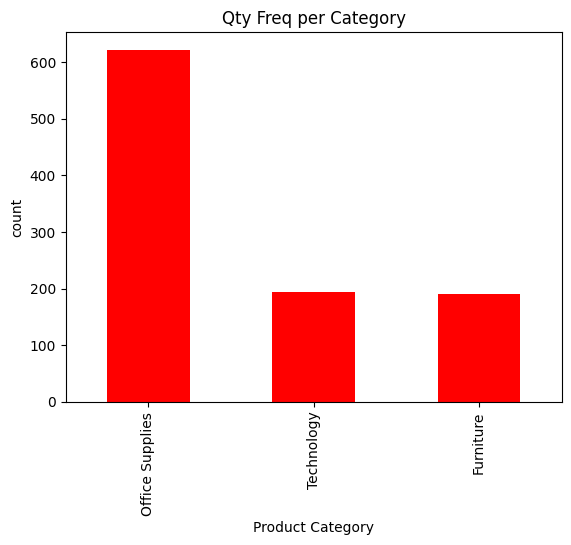

In [ ]:
final_df['Product Category'].value_counts().plot(kind = 'bar', color = 'red')
plt.title('Qty Freq per Category')
plt.ylabel('count')

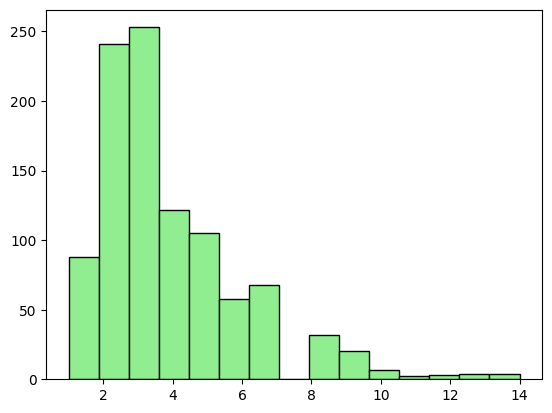

In [ ]:
# Histogram
plt.hist(final_df['Quantity'], bins = 15, color = 'lightgreen', edgecolor = 'black');

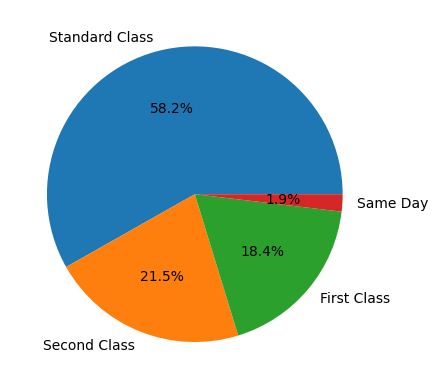

In [ ]:
# pie chart
shipping = final_df['Ship Mode'].value_counts()

plt.pie(
    shipping,
    labels = shipping.index,
    autopct = '%1.1f%%'

);

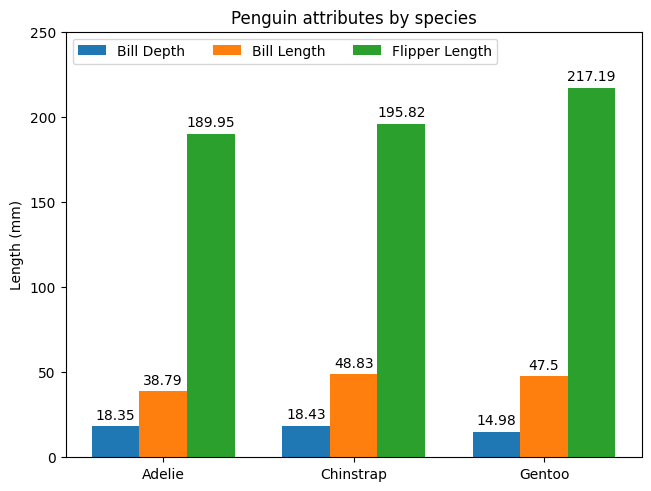

In [ ]:
# data from https://allisonhorst.github.io/palmerpenguins/

import matplotlib.pyplot as plt
import numpy as np

species = ("Adelie", "Chinstrap", "Gentoo")
penguin_means = {
    'Bill Depth': (18.35, 18.43, 14.98),
    'Bill Length': (38.79, 48.83, 47.50),
    'Flipper Length': (189.95, 195.82, 217.19),
}

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Penguin attributes by species')
ax.set_xticks(x + width, species)
ax.legend(loc='upper left', ncols=3)
ax.set_ylim(0, 250)

plt.show()

## Seaborn
---

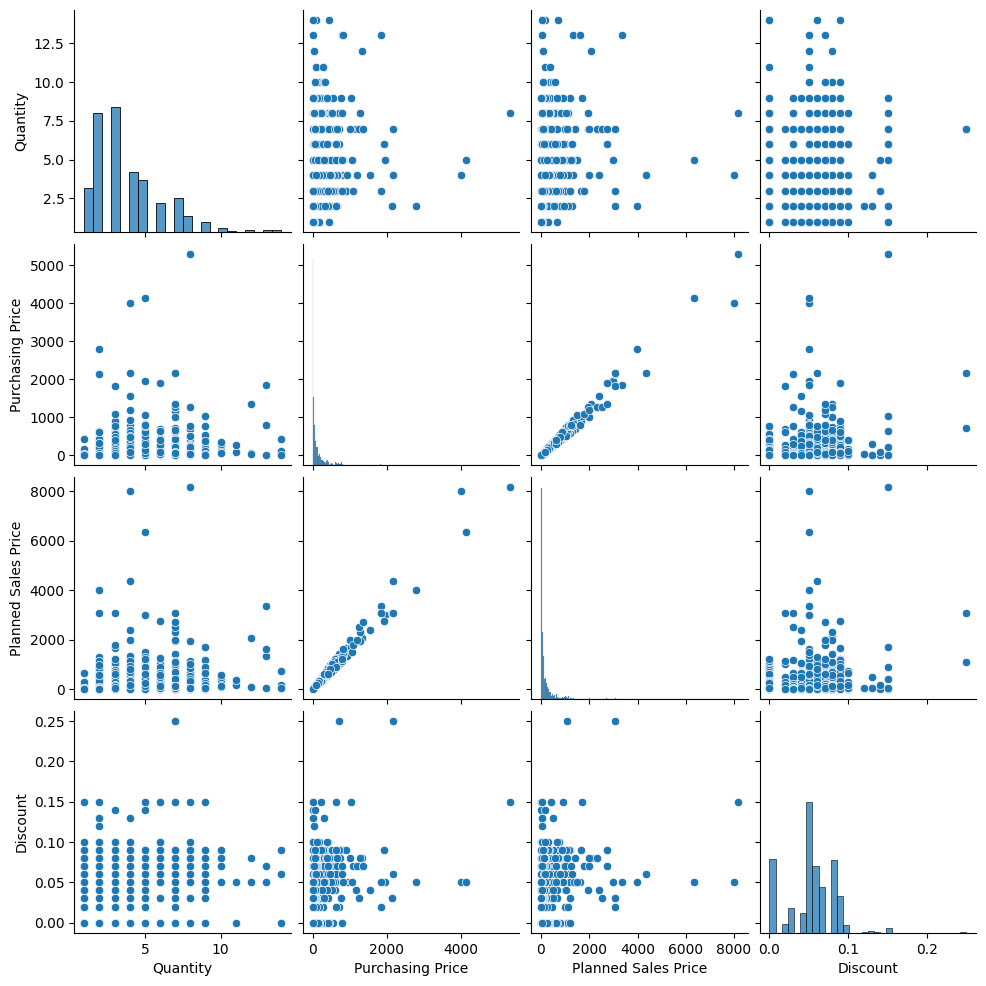

In [ ]:
sns.pairplot(final_df)

<ipython-input-103-7f82484792e4>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(final_df['Quantity'])


<Axes: xlabel='Quantity', ylabel='Density'>

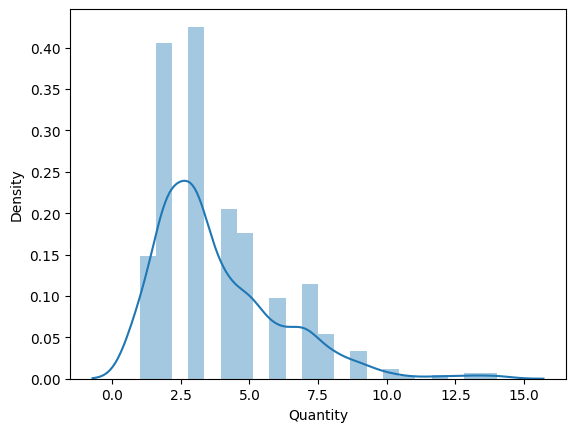

In [ ]:
sns.distplot(final_df['Quantity'])

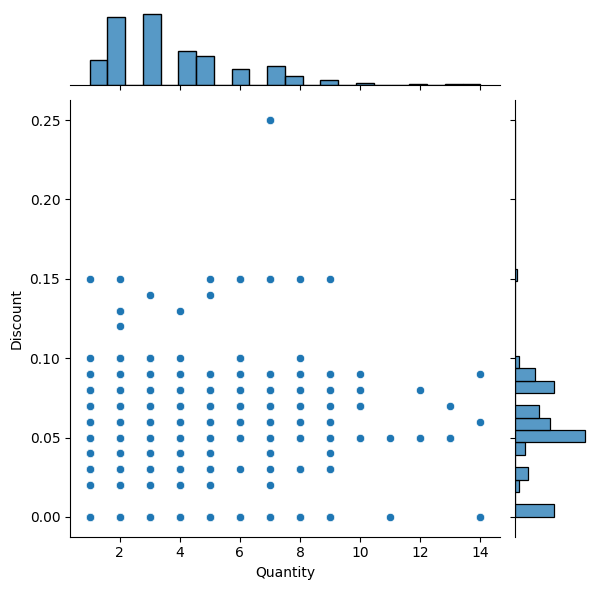

In [ ]:
sns.jointplot(
    data = final_df,
    x = 'Quantity',
    y = 'Discount'
)

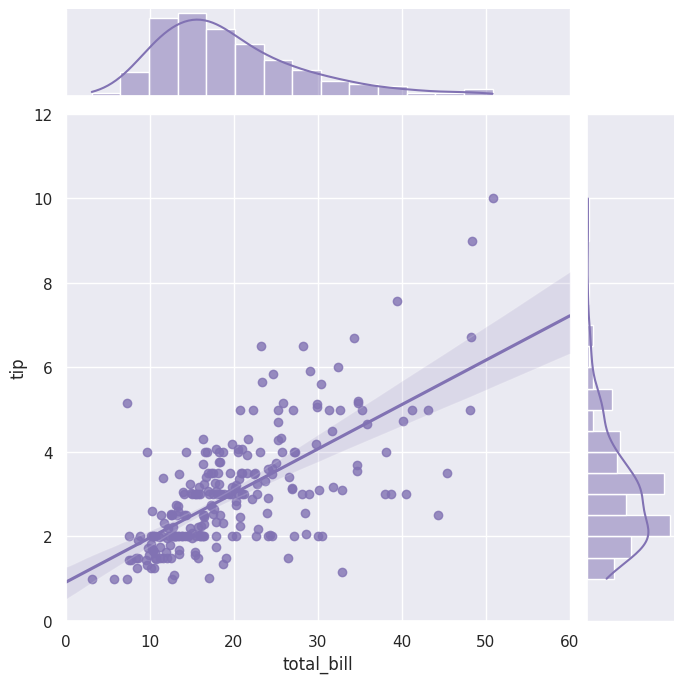

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)